# 팀 프로젝트 (8주차 과제)
## 기상청 데이터로 계절 분석

In [95]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [96]:
df = pd.read_csv('climate_2_2.csv', parse_dates=[1], encoding='utf-8')

In [97]:
df.tail()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
1367,108,2018-09-29,20.2,14.6,553,27.0,1520.0,NaN,NaN,NaN,...,21.3,22.5,23.0,21.1,17.8,3.5,5.0,NaN,NaN,NaN
1368,108,2018-09-30,17.6,14.0,2312,21.6,1453.0,NaN,NaN,NaN,...,21.5,22.4,22.9,21.1,17.9,4.2,6.0,NaN,NaN,NaN
1369,108,2018-10-01,15.4,13.0,2400,19.7,1418.0,0.58,0.0,NaN,...,21.2,22.3,22.8,21.1,17.9,3.1,4.4,0.0,{비}1620-1655.,NaN
1370,108,2018-10-02,15.9,10.3,653,22.0,1622.0,NaN,NaN,NaN,...,20.8,22.1,22.7,21.1,17.9,3.6,5.1,NaN,NaN,NaN
1371,108,2018-10-03,17.3,11.2,643,24.2,1526.0,NaN,NaN,NaN,...,20.6,21.9,22.5,21.1,17.9,3.6,5.2,NaN,NaN,NaN


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 60 columns):
지점                     1372 non-null int64
일시                     1372 non-null datetime64[ns]
평균기온(°C)               1372 non-null float64
최저기온(°C)               1372 non-null float64
최저기온 시각(hhmi)          1372 non-null int64
최고기온(°C)               1371 non-null float64
최고기온 시각(hhmi)          1371 non-null float64
강수 계속시간(hr)            517 non-null float64
10분 최다 강수량(mm)         333 non-null float64
10분 최다강수량 시각(hhmi)     239 non-null float64
1시간 최다강수량(mm)          333 non-null float64
1시간 최다 강수량 시각(hhmi)    243 non-null float64
일강수량(mm)               517 non-null float64
최대 순간 풍속(m/s)          1370 non-null float64
최대 순간 풍속 풍향(16방위)      1370 non-null float64
최대 순간풍속 시각(hhmi)       1370 non-null float64
최대 풍속(m/s)             1370 non-null float64
최대 풍속 풍향(16방위)         1370 non-null float64
최대 풍속 시각(hhmi)         1370 non-null float64
평균 풍속(m/s)             1369 non-null floa

In [99]:
for i in range(len(df.columns)):
    print('%02d : %s' % (i,df.columns[i]))

00 : 지점
01 : 일시
02 : 평균기온(°C)
03 : 최저기온(°C)
04 : 최저기온 시각(hhmi)
05 : 최고기온(°C)
06 : 최고기온 시각(hhmi)
07 : 강수 계속시간(hr)
08 : 10분 최다 강수량(mm)
09 : 10분 최다강수량 시각(hhmi)
10 : 1시간 최다강수량(mm)
11 : 1시간 최다 강수량 시각(hhmi)
12 : 일강수량(mm)
13 : 최대 순간 풍속(m/s)
14 : 최대 순간 풍속 풍향(16방위)
15 : 최대 순간풍속 시각(hhmi)
16 : 최대 풍속(m/s)
17 : 최대 풍속 풍향(16방위)
18 : 최대 풍속 시각(hhmi)
19 : 평균 풍속(m/s)
20 : 풍정합(100m)
21 : 평균 이슬점온도(°C)
22 : 최소 상대습도(%)
23 : 최소 상대습도 시각(hhmi)
24 : 평균 상대습도(%)
25 : 평균 증기압(hPa)
26 : 평균 현지기압(hPa)
27 : 최고 해면기압(hPa)
28 : 최고 해면기압 시각(hhmi)
29 : 최저 해면기압(hPa)
30 : 최저 해면기압 시각(hhmi)
31 : 평균 해면기압(hPa)
32 : 가조시간(hr)
33 : 합계 일조 시간(hr)
34 : 1시간 최다일사 시각(hhmi)
35 : 1시간 최다일사량(MJ/m2)
36 : 합계 일사(MJ/m2)
37 : 일 최심신적설(cm)
38 : 일 최심신적설 시각(hhmi)
39 : 일 최심적설(cm)
40 : 일 최심적설 시각(hhmi)
41 : 합계 3시간 신적설(cm)
42 : 평균 전운량(1/10)
43 : 평균 중하층운량(1/10)
44 : 평균 지면온도(°C)
45 : 최저 초상온도(°C)
46 : 평균 5cm 지중온도(°C)
47 : 평균 10cm 지중온도(°C)
48 : 평균 20cm 지중온도(°C)
49 : 평균 30cm 지중온도(°C)
50 : 0.5m 지중온도(°C)
51 : 1.0m 지중온도(°C)
52 : 1.5m 지중온도(°C)
53 : 3.0m 지중온도(°C)
54 

In [120]:
df2 = df.iloc[:,[1,2,3,5,19,21,24]]
df2.head()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%)
0,2015-01-01,-7.7,-9.8,-4.3,4.6,-18.8,41.4
1,2015-01-02,-6.0,-9.0,-1.9,3.2,-16.1,45.9
2,2015-01-03,-2.7,-9.2,3.1,1.9,-10.5,56.1
3,2015-01-04,2.5,0.2,8.5,2.0,-2.5,70.1
4,2015-01-05,3.7,-1.1,7.9,2.4,-1.0,73.1


In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 7 columns):
일시              1372 non-null datetime64[ns]
평균기온(°C)        1372 non-null float64
최저기온(°C)        1372 non-null float64
최고기온(°C)        1371 non-null float64
평균 풍속(m/s)      1369 non-null float64
평균 이슬점온도(°C)    1372 non-null float64
평균 상대습도(%)      1372 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 75.1 KB


In [122]:
df2[df2['최고기온(°C)'].isna()]

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%)
1015,2017-10-12,11.4,8.8,NaN,2.0,5.9,71.0


In [123]:
df2[df2['평균 풍속(m/s)'].isna()]

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%)
1017,2017-10-14,14.4,9.0,20.5,NaN,0.8,42.8
1069,2017-12-05,-4.2,-8.2,-0.4,NaN,-16.4,40.1
1070,2017-12-06,0.2,-4.5,6.0,NaN,-4.7,72.6


In [126]:
na_df = df2[(df2.isna()).any(axis=1)]
na_ids = na_df.index
display(na_df, na_ids)

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%)
1015,2017-10-12,11.4,8.8,NaN,2.0,5.9,71.0
1017,2017-10-14,14.4,9.0,20.5,NaN,0.8,42.8
1069,2017-12-05,-4.2,-8.2,-0.4,NaN,-16.4,40.1
1070,2017-12-06,0.2,-4.5,6.0,NaN,-4.7,72.6


Int64Index([1015, 1017, 1069, 1070], dtype='int64')

In [127]:
df3 = df2.ffill()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 7 columns):
일시              1372 non-null datetime64[ns]
평균기온(°C)        1372 non-null float64
최저기온(°C)        1372 non-null float64
최고기온(°C)        1372 non-null float64
평균 풍속(m/s)      1372 non-null float64
평균 이슬점온도(°C)    1372 non-null float64
평균 상대습도(%)      1372 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 75.1 KB


In [129]:
df3.isna().sum()

일시              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
평균 풍속(m/s)      0
평균 이슬점온도(°C)    0
평균 상대습도(%)      0
dtype: int64

In [130]:
df3.iloc[na_ids]

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%)
1015,2017-10-12,11.4,8.8,21.7,2.0,5.9,71.0
1017,2017-10-14,14.4,9.0,20.5,3.2,0.8,42.8
1069,2017-12-05,-4.2,-8.2,-0.4,3.4,-16.4,40.1
1070,2017-12-06,0.2,-4.5,6.0,3.4,-4.7,72.6


In [131]:
a = set(df3['일시'].values); a
b = set(pd.date_range('2015-1-1','2018-10-3').values)

a == b

True

In [138]:
dates = df3['일시'].apply(lambda t: pd.Series([t.year,t.month,t.day],index=['year','month','day']))

data = df3.merge(dates, left_index=True, right_index=True)
data.head()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%),year,month,day
0,2015-01-01,-7.7,-9.8,-4.3,4.6,-18.8,41.4,2015,1,1
1,2015-01-02,-6.0,-9.0,-1.9,3.2,-16.1,45.9,2015,1,2
2,2015-01-03,-2.7,-9.2,3.1,1.9,-10.5,56.1,2015,1,3
3,2015-01-04,2.5,0.2,8.5,2.0,-2.5,70.1,2015,1,4
4,2015-01-05,3.7,-1.1,7.9,2.4,-1.0,73.1,2015,1,5


In [139]:
X = data.iloc[:,1:-3].values
y = data.iloc[:,-2].values

display(X[:5],y[:5])

array([[ -7.7,  -9.8,  -4.3,   4.6, -18.8,  41.4],
       [ -6. ,  -9. ,  -1.9,   3.2, -16.1,  45.9],
       [ -2.7,  -9.2,   3.1,   1.9, -10.5,  56.1],
       [  2.5,   0.2,   8.5,   2. ,  -2.5,  70.1],
       [  3.7,  -1.1,   7.9,   2.4,  -1. ,  73.1]])

array([1, 1, 1, 1, 1], dtype=int64)

In [145]:
np.where(data['일시']=='2018-1-1')

(array([1096], dtype=int64),)

In [149]:
X_train = X[:1096]
y_train = y[:1096]
X_test = X[1096:]
y_test = y[1096:]

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1096, 6)

(276, 6)

(1096,)

(276,)

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train-X_mean)/X_std
X_test_scaled = (X_test-X_mean)/X_std
model=SVC(gamma=0.1)

model.fit(X_train_scaled,y_train)

pred_y=model.predict(X_test_scaled)
print('Train score : %f' % model.score(X_train_scaled,y_train))
print('Test score  : %f' % model.score(X_test_scaled,y_test))

print(y_test)
print(pred_y)

Train score : 0.526460
Test score  : 0.347826
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9 10 10 10]
[12  1  1  1  1 12 12 12  1  1  1  1 12 12 12 12 12 12 12 12 12 12  1  1
  1  1  1  1  1 12 12  1  1  1  1  1  1 

([<matplotlib.axis.YTick at 0x148da005f60>,
 <a list of 12 Text yticklabel objects>)

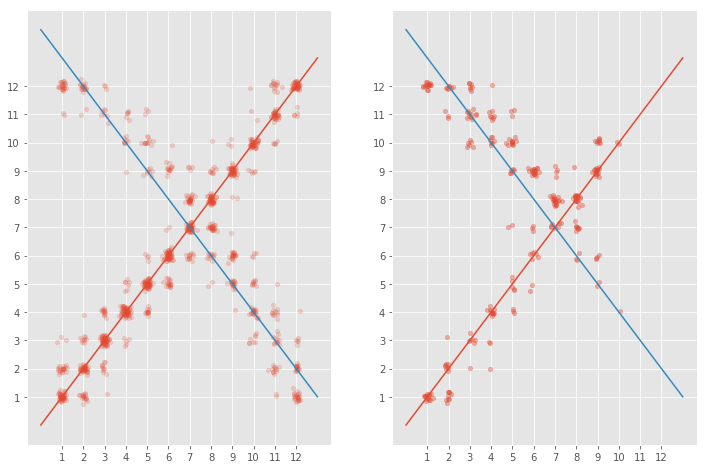

In [167]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=[12,8])

##################

plt.subplot(1,2,1)

plt.plot(range(14),range(14))
plt.plot(range(14),range(14,0,-1))

pred_y_train=model.predict(X_train_scaled)
plt.scatter(y_train+np.random.normal(0,0.1,len(y_train)), pred_y_train+np.random.normal(0,0.1,len(y_train))
           ,s=20,alpha=0.2)

plt.xticks(range(1,13))
plt.yticks(range(1,13))
#plt.grid()

##################

plt.subplot(1,2,2)

plt.plot(range(14),range(14))
plt.plot(range(14),range(14,0,-1))

pred_y_test=model.predict(X_test_scaled)
plt.scatter(y_test+np.random.normal(0,0.1,len(y_test)), pred_y_test+np.random.normal(0,0.1,len(y_test))
           ,s=20,alpha=0.4)

plt.xticks(range(1,13))
plt.yticks(range(1,13))
#plt.grid()